In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import math
import cv2
import numpy as np

import skimage.transform as st

%matplotlib inline

### Load image with only one line

In [2]:

#load an image 
img = cv2.imread('images/line.png')

img_copy=np.copy(img)

img_copy=cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)

#convert image to grayscale
img_gray=cv2.cvtColor(img_copy,cv2.COLOR_RGB2GRAY)

print("image space type:",type(img_gray)," data type:",img_gray.dtype," shape: ",img_gray.shape," dimension: ",img_gray.ndim)
print(" max:",np.max(img_gray)," min:",np.min(img_gray))

image space type: <class 'numpy.ndarray'>  data type: uint8  shape:  (299, 315)  dimension:  2
 max: 255  min: 91


### Finding edge by canny

In [3]:
#Define parameters for canny
img_edges =cv2.Canny(img_gray,50,100)
print("image space type:",type(img_edges)," data type:",img_edges.dtype," shape: ",img_edges.shape," dimension: ",img_edges.ndim)
print(" max:",np.max(img_edges)," min:",np.min(img_edges))
wide = img_edges.shape[0]
height = img_edges.shape[1]

image space type: <class 'numpy.ndarray'>  data type: uint8  shape:  (299, 315)  dimension:  2
 max: 255  min: 0


In [4]:
h, angles, d = st.hough_line(img_edges)

print("hough space type:",type(h)," data type:",h.dtype," shape: ",h.shape," dimension: ",h.ndim," max:",np.max(h)," min:",np.min(h))
print("angles space type:",type(angles)," data type:",angles.dtype," shape: ",angles.shape," dimension: ",angles.ndim)
print("dist space type:",type(d)," data type:",d.dtype," shape: ",d.shape," dimension: ",d.ndim," max:",np.max(d)," min:",np.min(d))

lines = cv2.HoughLines(img_edges,1,np.pi/180,100)
print("lines type:",type(lines),lines.dtype,lines.shape,lines.ndim)
img_h=np.copy(img_copy)

for line in lines:
        print(line)
        rho,theta=line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a)) 
        cv2.line(img_h,(x1,y1),(x2,y2),(0,255,0),2)
        

hough space type: <class 'numpy.ndarray'>  data type: uint64  shape:  (870, 180)  dimension:  2  max: 124  min: 0
angles space type: <class 'numpy.ndarray'>  data type: float64  shape:  (180,)  dimension:  1
dist space type: <class 'numpy.ndarray'>  data type: float64  shape:  (870,)  dimension:  1  max: 435.0  min: -435.0
lines type: <class 'numpy.ndarray'> float32 (2, 1, 2) 3
[[15.         2.1991148]]
[[18.         2.1991148]]


In [5]:
import math 
hough_d = math.sqrt(wide**2 + height**2)
print("hough_d:",hough_d)

angle_step = 0.5 * np.rad2deg(np.diff(angles).mean())
d_step = 0.5 * np.diff(d).mean()
# bounds = (np.rad2deg(angles[0]) - angle_step,
#           np.rad2deg(angles[-1]) + angle_step,
#           d[-1] + d_step, d[0] - d_step)
bounds = (np.rad2deg(angles[0]) + angle_step,
          np.rad2deg(angles[-1]) - angle_step,
          d[-1] - d_step, d[0] + d_step)
print("max angle",np.rad2deg(np.max(angles)),"min angle:",np.rad2deg(np.min(angles)))
print("max d",np.max(d),d[0],"min d",np.min(d),d[-1])

hough_d: 434.3109485150012
max angle 90.0 min angle: -90.0
max d 435.0 -435.0 min d -435.0 435.0


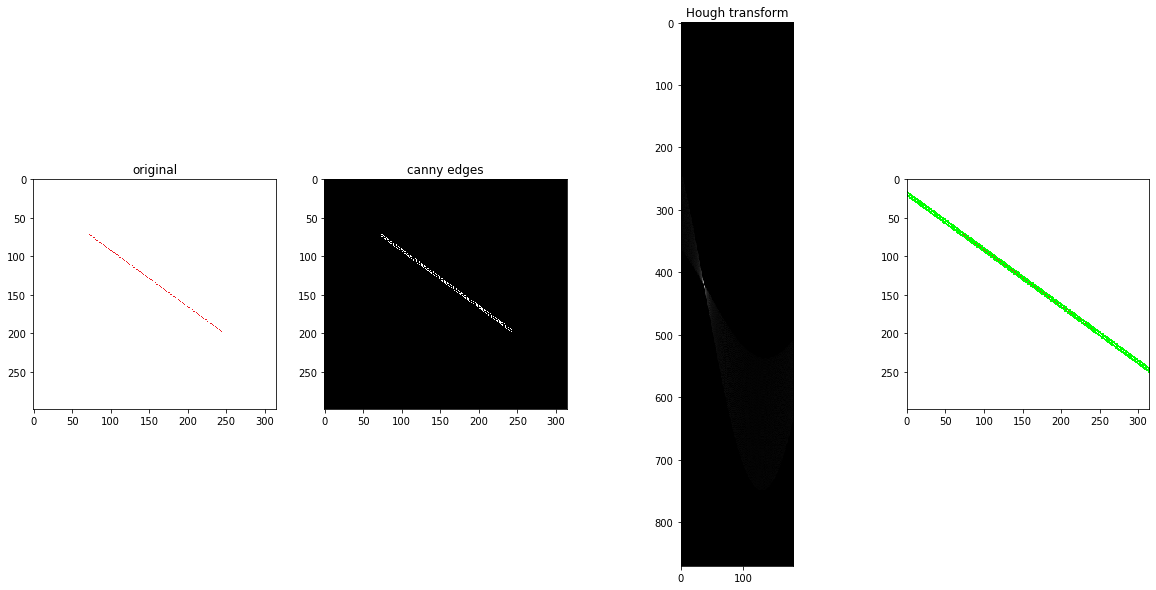

In [6]:
f,((ax1,ax2,ax3,ax4))=plt.subplots(1,4,figsize=(20,10))
ax1.set_title('original')
ax1.imshow(img_copy)
ax2.set_title('canny edges')
ax2.imshow(img_edges,cmap='gray')
ax3.set_title('Hough transform')
#ax3.imshow(np.log(1+h),cmap='gray')
ax3.imshow(h,cmap='gray')
#ax3.imshow(np.log(1+h),extent=[0,1,0,1],cmap='gray')
#ax3.imshow(np.log(1+h),extent=bounds,cmap='gray')
ax4.imshow(img_h)

1.5707963267948966 -1.5707963267948966 -1.5707963267948966 1.5707963267948966
181.0 -181.0 -181.0 181.0
angle_step= 0.5027932960893854


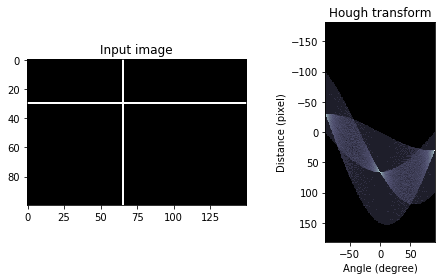

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import hough_line
from skimage.draw import line

img = np.zeros((100, 150), dtype=bool)
img[30, :] = 1
img[:, 65] = 1
#img[35:45, 35:50] = 1
#rr, cc = line(60, 130, 80, 10)
#img[rr, cc] = 1
#img += np.random.random(img.shape) > 0.95

out, angles, d = hough_line(img)

fix, axes = plt.subplots(1, 2, figsize=(7, 4))

axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Input image')

angle_step = 0.5 * np.rad2deg(np.diff(angles).mean())
d_step = 0.5 * np.diff(d).mean()
bounds = (np.rad2deg(angles[0]) - angle_step,
          np.rad2deg(angles[-1]) + angle_step,
          d[-1] + d_step, d[0] - d_step)

print(np.max(angles),angles[0],np.min(angles),angles[-1])
print(np.max(d),d[0],np.min(d),d[-1])

#axes[1].imshow(out, cmap=plt.cm.bone, extent=bounds)
axes[1].imshow(np.log(1+out), cmap=plt.cm.bone, extent=bounds)

axes[1].set_title('Hough transform')
axes[1].set_xlabel('Angle (degree)')
axes[1].set_ylabel('Distance (pixel)')

plt.tight_layout()
plt.show()